In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import cartopy.crs as ccrs

### Reading in the data

### Airlines

As of January 2012, the OpenFlights Airlines Database contains 5888 airlines. Each entry contains the following information:

**Airline ID**	Unique OpenFlights identifier for this airline.

**Name**	Name of the airline.

**Alias**	Alias of the airline. For example, All Nippon Airways is commonly known as "ANA".

**IATA**	2-letter IATA code, if available.

**ICAO**	3-letter ICAO code, if available.

**Callsign**	Airline callsign.

**Country**	Country or territory where airport is located. See Countries to cross-reference to ISO 3166-1 codes.

**Active**	"Y" if the airline is or has until recently been operational, "N" if it is defunct. This field is not reliable: in particular, major airlines that stopped flying long ago, but have not had their IATA code reassigned (eg. Ansett/AN), will incorrectly show as "Y".
The data is UTF-8 encoded. The special value \N is used for "NULL" to indicate that no value is available, and is understood automatically by MySQL if imported.

Notes: Airlines with null codes/callsigns/countries generally represent user-added airlines. Since the data is intended primarily for current flights, defunct IATA codes are generally not included. For example, "Sabena" is not listed with a SN IATA code, since "SN" is presently used by its successor Brussels Airlines.

In [4]:
input_data = "DATA/airlines.txt"

headers = ['ID', 'Name', 'Alias', 'IATA', 'ICAO', 'Callsign', 'Country', 'Active']

airlines = pd.read_csv(input_data, sep=',', names=headers)
airlines = airlines.iloc[1:,]

In [5]:
airlines.shape

(6161, 8)

In [6]:
airlines.head()

,ID,Name,Alias,IATA,ICAO,Callsign,Country,Active
1,1,Private flight,\N,-,NaN,NaN,NaN,Y
2,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
3,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N
5,5,213 Flight Unit,\N,NaN,TFU,NaN,Russia,N


### Airports

**Airport ID**	Unique OpenFlights identifier for this airport. 

**Name** Name of airport. May or may not contain the City name.

**City**	Main city served by airport. May be spelled differently from Name.

**Country**	Country or territory where airport is located. See Countries to cross-reference to ISO 3166-1 codes.

**IATA**	3-letter IATA code. Null if not assigned/unknown.

**ICAO**	4-letter ICAO code. Null if not assigned.

**Latitude**	Decimal degrees, usually to six significant digits. Negative is South, positive is North.

**Longitude**	Decimal degrees, usually to six significant digits. Negative is West, positive is East.

**Altitude**	In feet.

**Timezone**	Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.

**DST**	Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). 

**Tz database timezone**	Timezone in "tz" (Olson) format, eg. "America/Los_Angeles".

**Type**	Type of the airport. Value "airport" for air terminals, "station" for train stations, "port" for ferry terminals and "unknown" if not known. In airports.csv, only type=airport is included.

**Source**	Source of this data. "OurAirports" for data sourced from OurAirports, "Legacy" for old data not matched to OurAirports (mostly DAFIF), "User" for unverified user contributions. In airports.csv, only source=OurAirports is included.
The data is UTF-8 encoded.

Note: Rules for daylight savings time change from year to year and from country to country. The current data is an approximation for 2009, built on a country level. Most airports in DST-less regions in countries that generally observe DST (eg. AL, HI in the USA, NT, QL in Australia, parts of Canada) are marked incorrectly.

In [46]:
input_data = "DATA/airports.txt"

headers = ['ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz database timezone', 'Type', 'Source']

airports = pd.read_csv(input_data, sep=',', names=headers)

In [47]:
#Remove nodes with missing coordinate values

airports = airports[airports.notnull()]

In [48]:
airports.shape

(7698, 14)

In [49]:
airports.head()

,ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database timezone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [53]:
airports['Longitude'].isna().sum()

0

### Routes

As of June 2014, the OpenFlights/Airline Route Mapper Route Database contains 67663 routes between 3321 airports on 548 airlines spanning the globe, as shown in the map above. Each entry contains the following information:

**Airline**	2-letter (IATA) or 3-letter (ICAO) code of the airline.

**Airline ID**	Unique OpenFlights identifier for airline (see Airline).

**Source airport**	3-letter (IATA) or 4-letter (ICAO) code of the source airport.

**Source airport ID**	Unique OpenFlights identifier for source airport (see Airport)

**Destination airport**	3-letter (IATA) or 4-letter (ICAO) code of the destination airport.

**Destination airport ID**	Unique OpenFlights identifier for destination airport (see Airport)

**Codeshare**	"Y" if this flight is a codeshare (that is, not operated by Airline, but another carrier), empty otherwise.

**Stops**	Number of stops on this flight ("0" for direct)

**Equipment**	3-letter codes for plane type(s) generally used on this flight, separated by spaces
The data is UTF-8 encoded. The special value \N is used for "NULL" to indicate that no value is available, and is understood automatically by MySQL if imported.

Notes:
Routes are directional: if an airline operates services from A to B and from B to A, both A-B and B-A are listed separately.
Routes where one carrier operates both its own and codeshare flights are listed only once.

In [10]:
input_data = "DATA/routes.txt"

headers = ['Airline', 'Airline ID', 'Source', 'Source ID', 'Destination', 'Destination ID', 'Codeshare', 'Stops', 'Equipment']

routes = pd.read_csv(input_data, sep=',', names=headers)

In [11]:
routes.shape

(67663, 9)

In [12]:
routes.head()

,Airline,Airline ID,Source,Source ID,Destination,Destination ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


### Graph creation

In [13]:
import networkx as nx

In [70]:
G = nx.DiGraph()

for index, row in airports.iterrows():
    G.add_node(row['ID'], name=row['Name'], city=row['City'], country=row['Country'], iata=row['IATA'], icao=row['ICAO'], lat=row['Latitude'], lon=row['Longitude'])

for index, row in routes.iterrows():
    try:
        #Attempt to convert Source ID and Destination ID to integers
        source_id = int(row['Source ID'])
        dest_id = int(row['Destination ID'])
    except ValueError:
        #If conversion fails, skip this row
        print(f"Skipping invalid route from {row['Source ID']} to {row['Destination ID']}")
        continue

    #Retrieve source and destination node information
    if source_id in G.nodes and dest_id in G.nodes:
        source_node = G.nodes[source_id]
        dest_node = G.nodes[dest_id]

        #Check if both nodes have latitude and longitude information
        if 'lat' in source_node and 'lon' in source_node and 'lat' in dest_node and 'lon' in dest_node:
            
            G.add_edge(source_id, dest_id, 
                       airline=row['Airline ID'],
                       source_lat=source_node['lat'], source_lon=source_node['lon'],
                       dest_lat=dest_node['lat'], dest_lon=dest_node['lon'])
        else:
            print(f"Missing location data for route from {source_id} to {dest_id}")
    else:
        print(f"One or both airports not found for route from {source_id} to {dest_id}")

Skipping invalid route from 4029 to \N
Skipping invalid route from \N to 4029
Skipping invalid route from 2937 to \N
Skipping invalid route from \N to 2937
One or both airports not found for route from 3531 to 7167
One or both airports not found for route from 3531 to 7168
One or both airports not found for route from 3531 to 7164
One or both airports not found for route from 3531 to 7163
One or both airports not found for route from 7167 to 7176
One or both airports not found for route from 7168 to 7173
One or both airports not found for route from 7164 to 7165
One or both airports not found for route from 7173 to 7172
One or both airports not found for route from 7144 to 7145
One or both airports not found for route from 7144 to 3808
One or both airports not found for route from 7145 to 7144
One or both airports not found for route from 7145 to 7147
One or both airports not found for route from 7145 to 3808
One or both airports not found for route from 7147 to 7145
One or both airpor

#### Plotting the graph on a world map

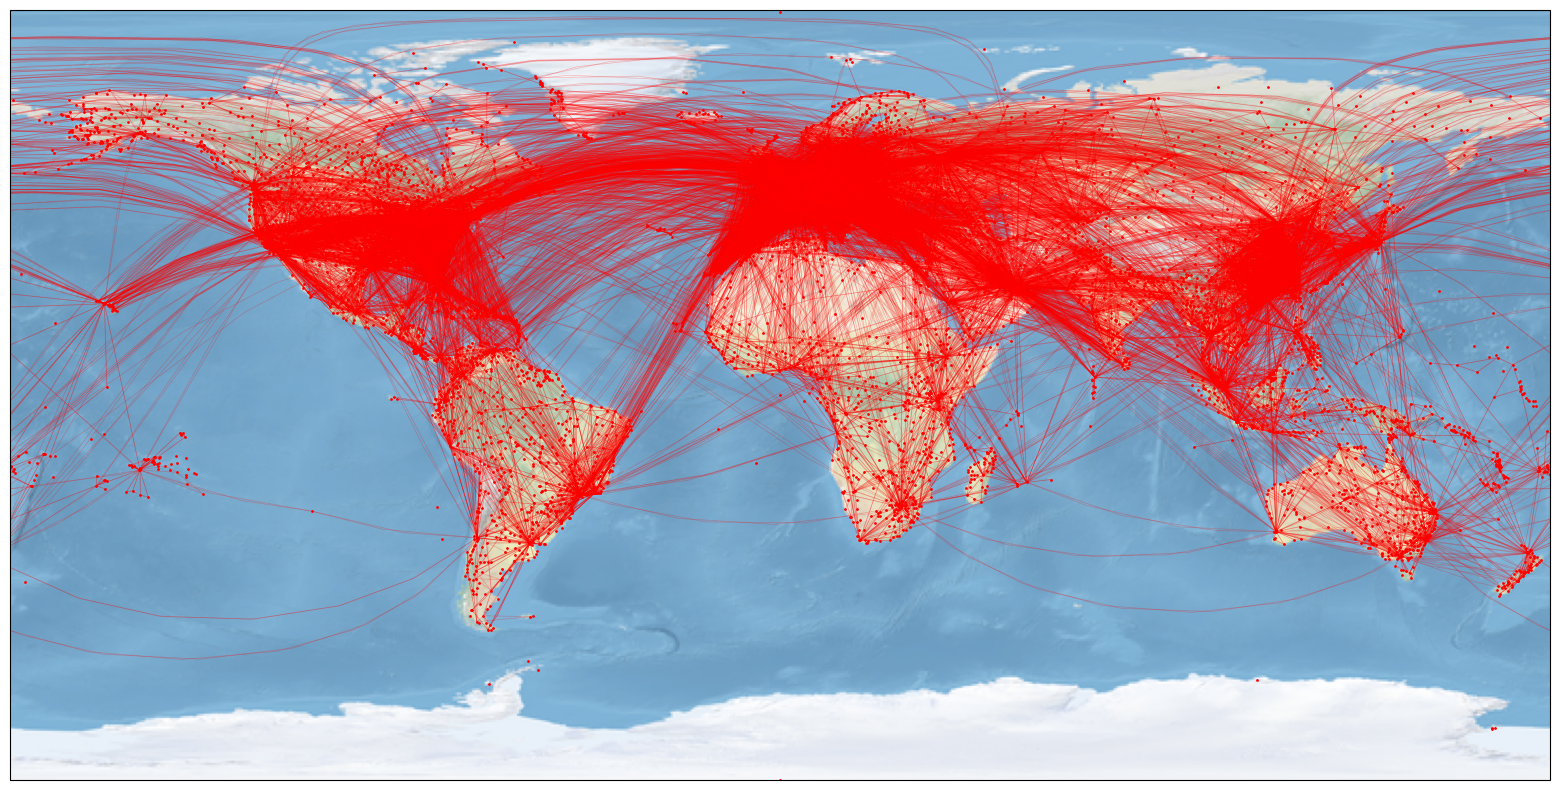

In [71]:
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()
ax.stock_img()  

#Airports
for node, attrs in G.nodes(data=True):
    #Check if both 'lat' and 'lon' attributes exist
    if 'lon' in attrs and 'lat' in attrs:
        ax.plot(attrs['lon'], attrs['lat'], marker='o', color='red', markersize=1, transform=ccrs.Geodetic())


#Routes
for source, dest, attrs in G.edges(data=True):
    source_node = G.nodes[source]
    dest_node = G.nodes[dest]
        
    source_coords = (source_node['lat'], source_node['lon'])
    dest_coords = (dest_node['lat'], dest_node['lon'])
                     
        ax.plot([source_coords[1], dest_coords[1]], [source_coords[0], dest_coords[0]], color='red', linewidth=0.5, alpha=0.25, transform=ccrs.Geodetic())

plt.show()